In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats

Declaring the training set, validation set and test set as well as their labels.

In [2]:
train = np.loadtxt('MNIST-Train-cropped.txt')
train = np.matrix(train.reshape(10000,784).T) #every column is an image(digit)
val = train[:,-2000:] #dividing the training set in training set and validation set
train = train[:,:8000]

lbltrain = np.loadtxt('MNIST-Train-Labels-cropped.txt') 
lblval = lbltrain[-2000:]#dividing the labels, training labels and validation labels
lbltrain = lbltrain[:8000]

test = np.loadtxt('MNIST-Test-cropped.txt')
test = np.matrix(test.reshape(2000,784).T) #every column is an image(digit)
lbltest = np.loadtxt('MNIST-Test-Labels-cropped.txt')

Here I define a function k_nn that returns a #testsamples x 17 - Matrix output where output(i,k) - is the label y_i of the K_nn, and an accuracy array where each entry corresponds to each K.

Examples: output[0,0] = Y1' with K=1 ; 
          output[0,1]=Y1' with K=3 ;
          output[1,2]=Y2' with K=5. 

In [3]:
def k_nn(trainingset,labels_training,testset,labels_test):
    output=np.zeros((2000,17))
    trainT = trainingset.T
    accuracy=np.zeros(17)
    for i in range(2000):
        distance=euclidean_distances(testset[:,i].T,trainT) #array with 10000 distances between every x and (x1,x2,...,x10000)
        sortindex = np.argsort(distance) #indexes of lbltrain where are the k-points. (ascending)
        sortvec = labels_training[sortindex] #labels of the N points in ascending order by distance.
        k=0
        while k<=33:
            if k%2==1:
                j=int((k-1)/2)
                output[i,j]=stats.mode(sortvec[:,:k],axis=None)[0][0] #Mode of the K points (most frequent label)
                accuracy[j]=np.sum(output[:,j]==labels_test)/2000 #number of correct labels over the 2000 labels for each k.
            k=k+1
    return(output,accuracy) 

In [4]:
Outputtest, accuracytest = k_nn(train,lbltrain,test,lbltest) #it took one/two minutes to compute

In [5]:
Outputvalid, accuracyvalid = k_nn(train,lbltrain,val,lblval) #it took one/two minutes to compute

Plot of the accuracy of K_nn, for each k and for both sets, test set and validation set.

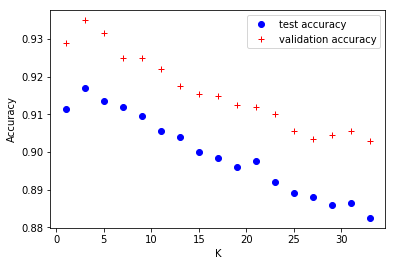

In [6]:
plt.plot(np.arange(1, 34, 2), accuracytest,'bo', label='test accuracy')
plt.plot(np.arange(1, 34, 2), accuracyvalid,'r+', label='validation accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

For example we have our predictions for the test with $k = 8*2+1=17$ (
Notice that in the 1970-th row the prediction is wrong):

In [7]:
M=pd.DataFrame(data=np.array([lbltest,Outputtest[:,8]]).T)
M

,0,1
0,7.0,7.0
1,2.0,2.0
2,1.0,1.0
3,0.0,0.0
4,4.0,4.0
5,1.0,1.0
6,4.0,4.0
7,9.0,9.0
8,5.0,5.0
9,9.0,9.0


Here I define a function to calculate the error that will help us to answer tasks one, two and three.

In [8]:
def distinguish(reallabels,predictionsmatrix,a,b,k):
    M=np.array([reallabels,predictionsmatrix[:,int((k-1)/2)]]).T
    error=0
    
    for i in range(len(reallabels)):
        if M[i,0]==a and M[i,1]==b:
            error=1+error
        if M[i,0]==b and M[i,1]==a:
            error=1+error
    error = error/(sum(M[:,0]==a)+sum(M[:,0]==b)) 
    return(error)

In [9]:
task_one_testerror = np.zeros(17)
task_one_valerror= np.zeros(17)
task_two_testerror= np.zeros(17)
task_two_valerror= np.zeros(17)
task_three_testerror= np.zeros(17)
task_three_valerror= np.zeros(17)

Task 1 - Distinguish between 0 and 1.

In [11]:
for i in range(17):
    task_one_testerror[i]=distinguish(lbltest,Outputtest,0,1,i*2+1)
    task_one_valerror[i]=distinguish(lblval,Outputvalid,0,1,i*2+1)

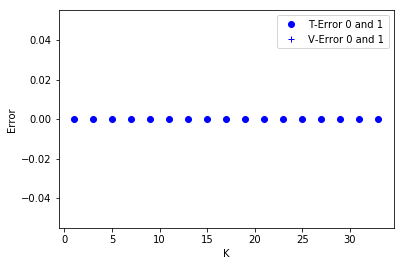

In [12]:
plt.plot(np.arange(1, 34, 2), task_one_testerror,'bo', label='T-Error 0 and 1')
plt.plot(np.arange(1, 34, 2), task_one_valerror,'b+', label='V-Error 0 and 1')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

Task 2 - Distinguish between 0 and 8.

In [13]:
for i in range(17):
    task_two_testerror[i]=distinguish(lbltest,Outputtest,0,8,i*2+1)
    task_two_valerror[i]=distinguish(lblval,Outputvalid,0,8,i*2+1)

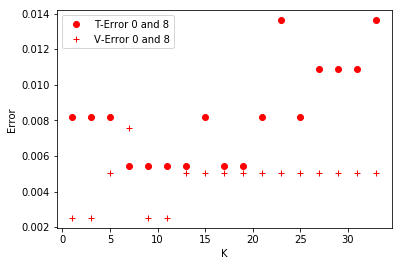

In [14]:
plt.plot(np.arange(1, 34, 2), task_two_testerror,'ro', label='T-Error 0 and 8')
plt.plot(np.arange(1, 34, 2), task_two_valerror,'r+', label='V-Error 0 and 8')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

Task 3 - Distinguish between 5 and 6.

In [15]:
for i in range(17):
    task_three_testerror[i]=distinguish(lbltest,Outputtest,5,6,i*2+1)
    task_three_valerror[i]=distinguish(lblval,Outputvalid,5,6,i*2+1)

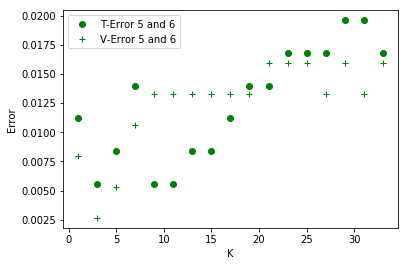

In [16]:
plt.plot(np.arange(1, 34, 2), task_three_testerror,'go', label='T-Error 5 and 6')
plt.plot(np.arange(1, 34, 2), task_three_valerror,'g+', label='V-Error 5 and 6')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

Figure, with all the plots.

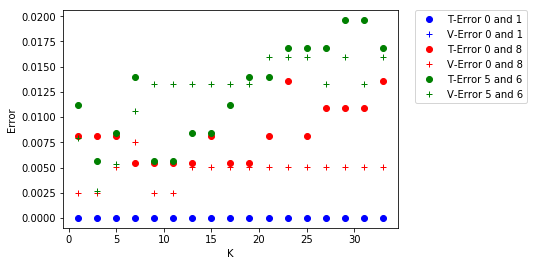

In [17]:
plt.plot(np.arange(1, 34, 2), task_one_testerror,'bo', label='T-Error 0 and 1')
plt.plot(np.arange(1, 34, 2), task_one_valerror,'b+', label='V-Error 0 and 1')
plt.plot(np.arange(1, 34, 2), task_two_testerror,'ro', label='T-Error 0 and 8')
plt.plot(np.arange(1, 34, 2), task_two_valerror,'r+', label='V-Error 0 and 8')
plt.plot(np.arange(1, 34, 2), task_three_testerror,'go', label='T-Error 5 and 6')
plt.plot(np.arange(1, 34, 2), task_three_valerror,'g+', label='V-Error 5 and 6')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Errors of task 2 and task 3 (task 1 = 0 for all k and for both sets). Each row i is related with k=i*2+1. And column 0 is the test error and column 1 is the validation error.

In [18]:
errortwo=pd.DataFrame(data=np.array([task_two_testerror,task_two_valerror]).T)
errortwo

,0,1
0,0.008174,0.002519
1,0.008174,0.002519
2,0.008174,0.005038
3,0.005450,0.007557
4,0.005450,0.002519
5,0.005450,0.002519
6,0.005450,0.005038
7,0.008174,0.005038
8,0.005450,0.005038
9,0.005450,0.005038


In [19]:
errorthree=pd.DataFrame(data=np.array([task_three_testerror,task_three_valerror]).T)
errorthree

,0,1
0,0.011204,0.007958
1,0.005602,0.002653
2,0.008403,0.005305
3,0.014006,0.010610
4,0.005602,0.013263
5,0.005602,0.013263
6,0.008403,0.013263
7,0.008403,0.013263
8,0.011204,0.013263
9,0.014006,0.013263
